# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [138]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [139]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [140]:
spaceship.shape

(8693, 14)

**Check for data types**

In [141]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [142]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [143]:
spaceship.dropna(inplace=True)

In [144]:
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [145]:
spaceship['Cabin'] = spaceship['Cabin'].str[0]
spaceship['Cabin'].head(20)

0     B
1     F
2     A
3     A
4     F
5     F
6     F
8     F
9     B
11    B
12    F
13    G
14    F
17    F
18    F
19    G
20    F
21    E
22    E
24    E
Name: Cabin, dtype: object

- Drop PassengerId and Name

In [146]:
spaceship= spaceship.drop(columns=['PassengerId', 'Name'])
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [147]:
numerical = spaceship[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
numerical

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


- For non-numerical columns, do dummies.

In [148]:
categorical = spaceship[['HomePlanet','CryoSleep','Cabin','Destination','VIP']]
categorical

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B,TRAPPIST-1e,False
1,Earth,False,F,TRAPPIST-1e,False
2,Europa,False,A,TRAPPIST-1e,True
3,Europa,False,A,TRAPPIST-1e,False
4,Earth,False,F,TRAPPIST-1e,False
...,...,...,...,...,...
8688,Europa,False,A,55 Cancri e,True
8689,Earth,True,G,PSO J318.5-22,False
8690,Earth,False,G,TRAPPIST-1e,False
8691,Europa,False,E,55 Cancri e,False


In [149]:
categorical_num= pd.get_dummies(categorical, drop_first = True)
categorical_num

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,True,False,False,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,False,False,False,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,True,False,False,False,False,False,False,False,False,False,False,False,True
8689,False,False,True,False,False,False,False,False,True,False,True,False,False
8690,False,False,False,False,False,False,False,False,True,False,False,True,False
8691,True,False,False,False,False,False,True,False,False,False,False,False,False


In [150]:
features = pd.concat([categorical_num, numerical], axis = 1)
features

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,True,False,False,True,False,False,False,False,False,False,False,True,False,39.0,0.0,0.0,0.0,0.0,0.0
1,False,False,False,False,False,False,False,True,False,False,False,True,False,24.0,109.0,9.0,25.0,549.0,44.0
2,True,False,False,False,False,False,False,False,False,False,False,True,True,58.0,43.0,3576.0,0.0,6715.0,49.0
3,True,False,False,False,False,False,False,False,False,False,False,True,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,False,False,False,False,False,False,False,True,False,False,False,True,False,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,True,False,False,False,False,False,False,False,False,False,False,False,True,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,False,False,True,False,False,False,False,False,True,False,True,False,False,18.0,0.0,0.0,0.0,0.0,0.0
8690,False,False,False,False,False,False,False,False,True,False,False,True,False,26.0,0.0,0.0,1872.0,1.0,0.0
8691,True,False,False,False,False,False,True,False,False,False,False,False,False,32.0,0.0,1049.0,0.0,353.0,3235.0


In [151]:
target = spaceship["Transported"]

**Perform Train Test Split**

In [152]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [153]:
normalizer = MinMaxScaler()

In [154]:
normalizer.fit(X_train)

MinMaxScaler()

In [155]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [156]:
X_train_norm

array([[0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05127633,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.34889325,
        0.00472069],
       [1.        , 0.        , 0.        , ..., 0.        , 0.03056944,
        0.08748033],
       [1.        , 0.        , 0.        , ..., 0.        , 0.02579436,
        0.01052321]])

In [157]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.405063,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.050633,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.379747,0.00000,0.007916,0.000000,0.051276,0.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.215190,0.00131,0.000000,0.046111,0.016378,0.000049
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.329114,0.00000,0.000000,0.000000,0.000000,0.000000


In [158]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.632911,0.0,0.000000,0.0,0.00000,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.227848,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.189873,0.0,0.000000,0.0,0.00000,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.658228,0.0,0.000000,0.0,0.00000,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.784810,0.0,0.054775,0.0,0.07774,0.0


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [159]:
knn = KNeighborsClassifier(n_neighbors=3)

In [160]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

- Evaluate your model's performance. Comment it

In [161]:
knn.score(X_test_norm, y_test)

0.7534039334341907

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
log_reg = LogisticRegression()

In [164]:
log_reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
pred = log_reg.predict_proba(X_test)

In [166]:
pred # first column % confidence that passenger was transported and second column % confidence the passenger was not transferred. 

array([[0.15204308, 0.84795692],
       [0.25741881, 0.74258119],
       [0.20638104, 0.79361896],
       ...,
       [0.01448904, 0.98551096],
       [0.24619485, 0.75380515],
       [0.06499364, 0.93500636]])

In [167]:
tree = DecisionTreeRegressor(max_depth=3)

In [168]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=3)

In [169]:
X_train_norm

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.405063,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.050633,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.379747,0.000000,0.007916,0.000000,0.051276,0.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.215190,0.001310,0.000000,0.046111,0.016378,0.000049
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.670886,0.000000,0.000000,0.000000,0.000000,0.000000
5280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.455696,0.000000,0.000000,0.000000,0.032355,0.000098
5281,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.455696,0.000000,0.159528,0.000000,0.348893,0.004721
5282,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.430380,0.000000,0.000134,0.000000,0.030569,0.087480


In [170]:
y_test

2453     True
1334    False
8272     True
5090    False
4357     True
        ...  
85      False
6816     True
5926     True
3793     True
6640     True
Name: Transported, Length: 1322, dtype: bool

In [171]:
pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test)) #
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 0.33757330060140334
RMSE 0.41646906616712165
R2 score 0.30621406770354254


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#MAE = measures the average magnitude of the errors between predicted values and actual values, without considering their direction (positive or negative).
#It is the mean over the test sample of the absolute differences between prediction and actual observation.

In [ ]:
#RMSE is the square root of the average of the squared differences between the predicted values and the actual values.
#It essentially measures the standard deviation of the prediction errors (residuals).

In [ ]:
#The ( R^2 ) score, also known as the coefficient of determination, is a statistical measure that is used to assess how well 
#a regression model's predictions approximate the actual data points. It provides insight into the proportion of variance in the 
#dependent variable that is predictable from the independent variables.

In [172]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance   

{'HomePlanet_Europa': 0.0,
 'HomePlanet_Mars': 0.0,
 'CryoSleep_True': 0.6331763081662176,
 'Cabin_B': 0.0,
 'Cabin_C': 0.0,
 'Cabin_D': 0.0,
 'Cabin_E': 0.027759539727309553,
 'Cabin_F': 0.0,
 'Cabin_G': 0.08715515290528995,
 'Cabin_T': 0.0,
 'Destination_PSO J318.5-22': 0.0,
 'Destination_TRAPPIST-1e': 0.00960885890211355,
 'VIP_True': 0.0,
 'Age': 0.0,
 'RoomService': 0.12480524409714913,
 'FoodCourt': 0.028345473438135604,
 'ShoppingMall': 0.0,
 'Spa': 0.08914942276378451,
 'VRDeck': 0.0}

In [173]:
from sklearn.tree import export_text

tree_viz = export_text(tree, feature_names=list(X_train_norm.columns))
print(tree_viz)

|--- CryoSleep_True <= 0.50
|   |--- Spa <= 0.01
|   |   |--- RoomService <= 0.03
|   |   |   |--- value: [0.50]
|   |   |--- RoomService >  0.03
|   |   |   |--- value: [0.19]
|   |--- Spa >  0.01
|   |   |--- FoodCourt <= 0.05
|   |   |   |--- value: [0.11]
|   |   |--- FoodCourt >  0.05
|   |   |   |--- value: [0.40]
|--- CryoSleep_True >  0.50
|   |--- Cabin_G <= 0.50
|   |   |--- Cabin_E <= 0.50
|   |   |   |--- value: [0.99]
|   |   |--- Cabin_E >  0.50
|   |   |   |--- value: [0.64]
|   |--- Cabin_G >  0.50
|   |   |--- Destination_TRAPPIST-1e <= 0.50
|   |   |   |--- value: [0.74]
|   |   |--- Destination_TRAPPIST-1e >  0.50
|   |   |   |--- value: [0.60]



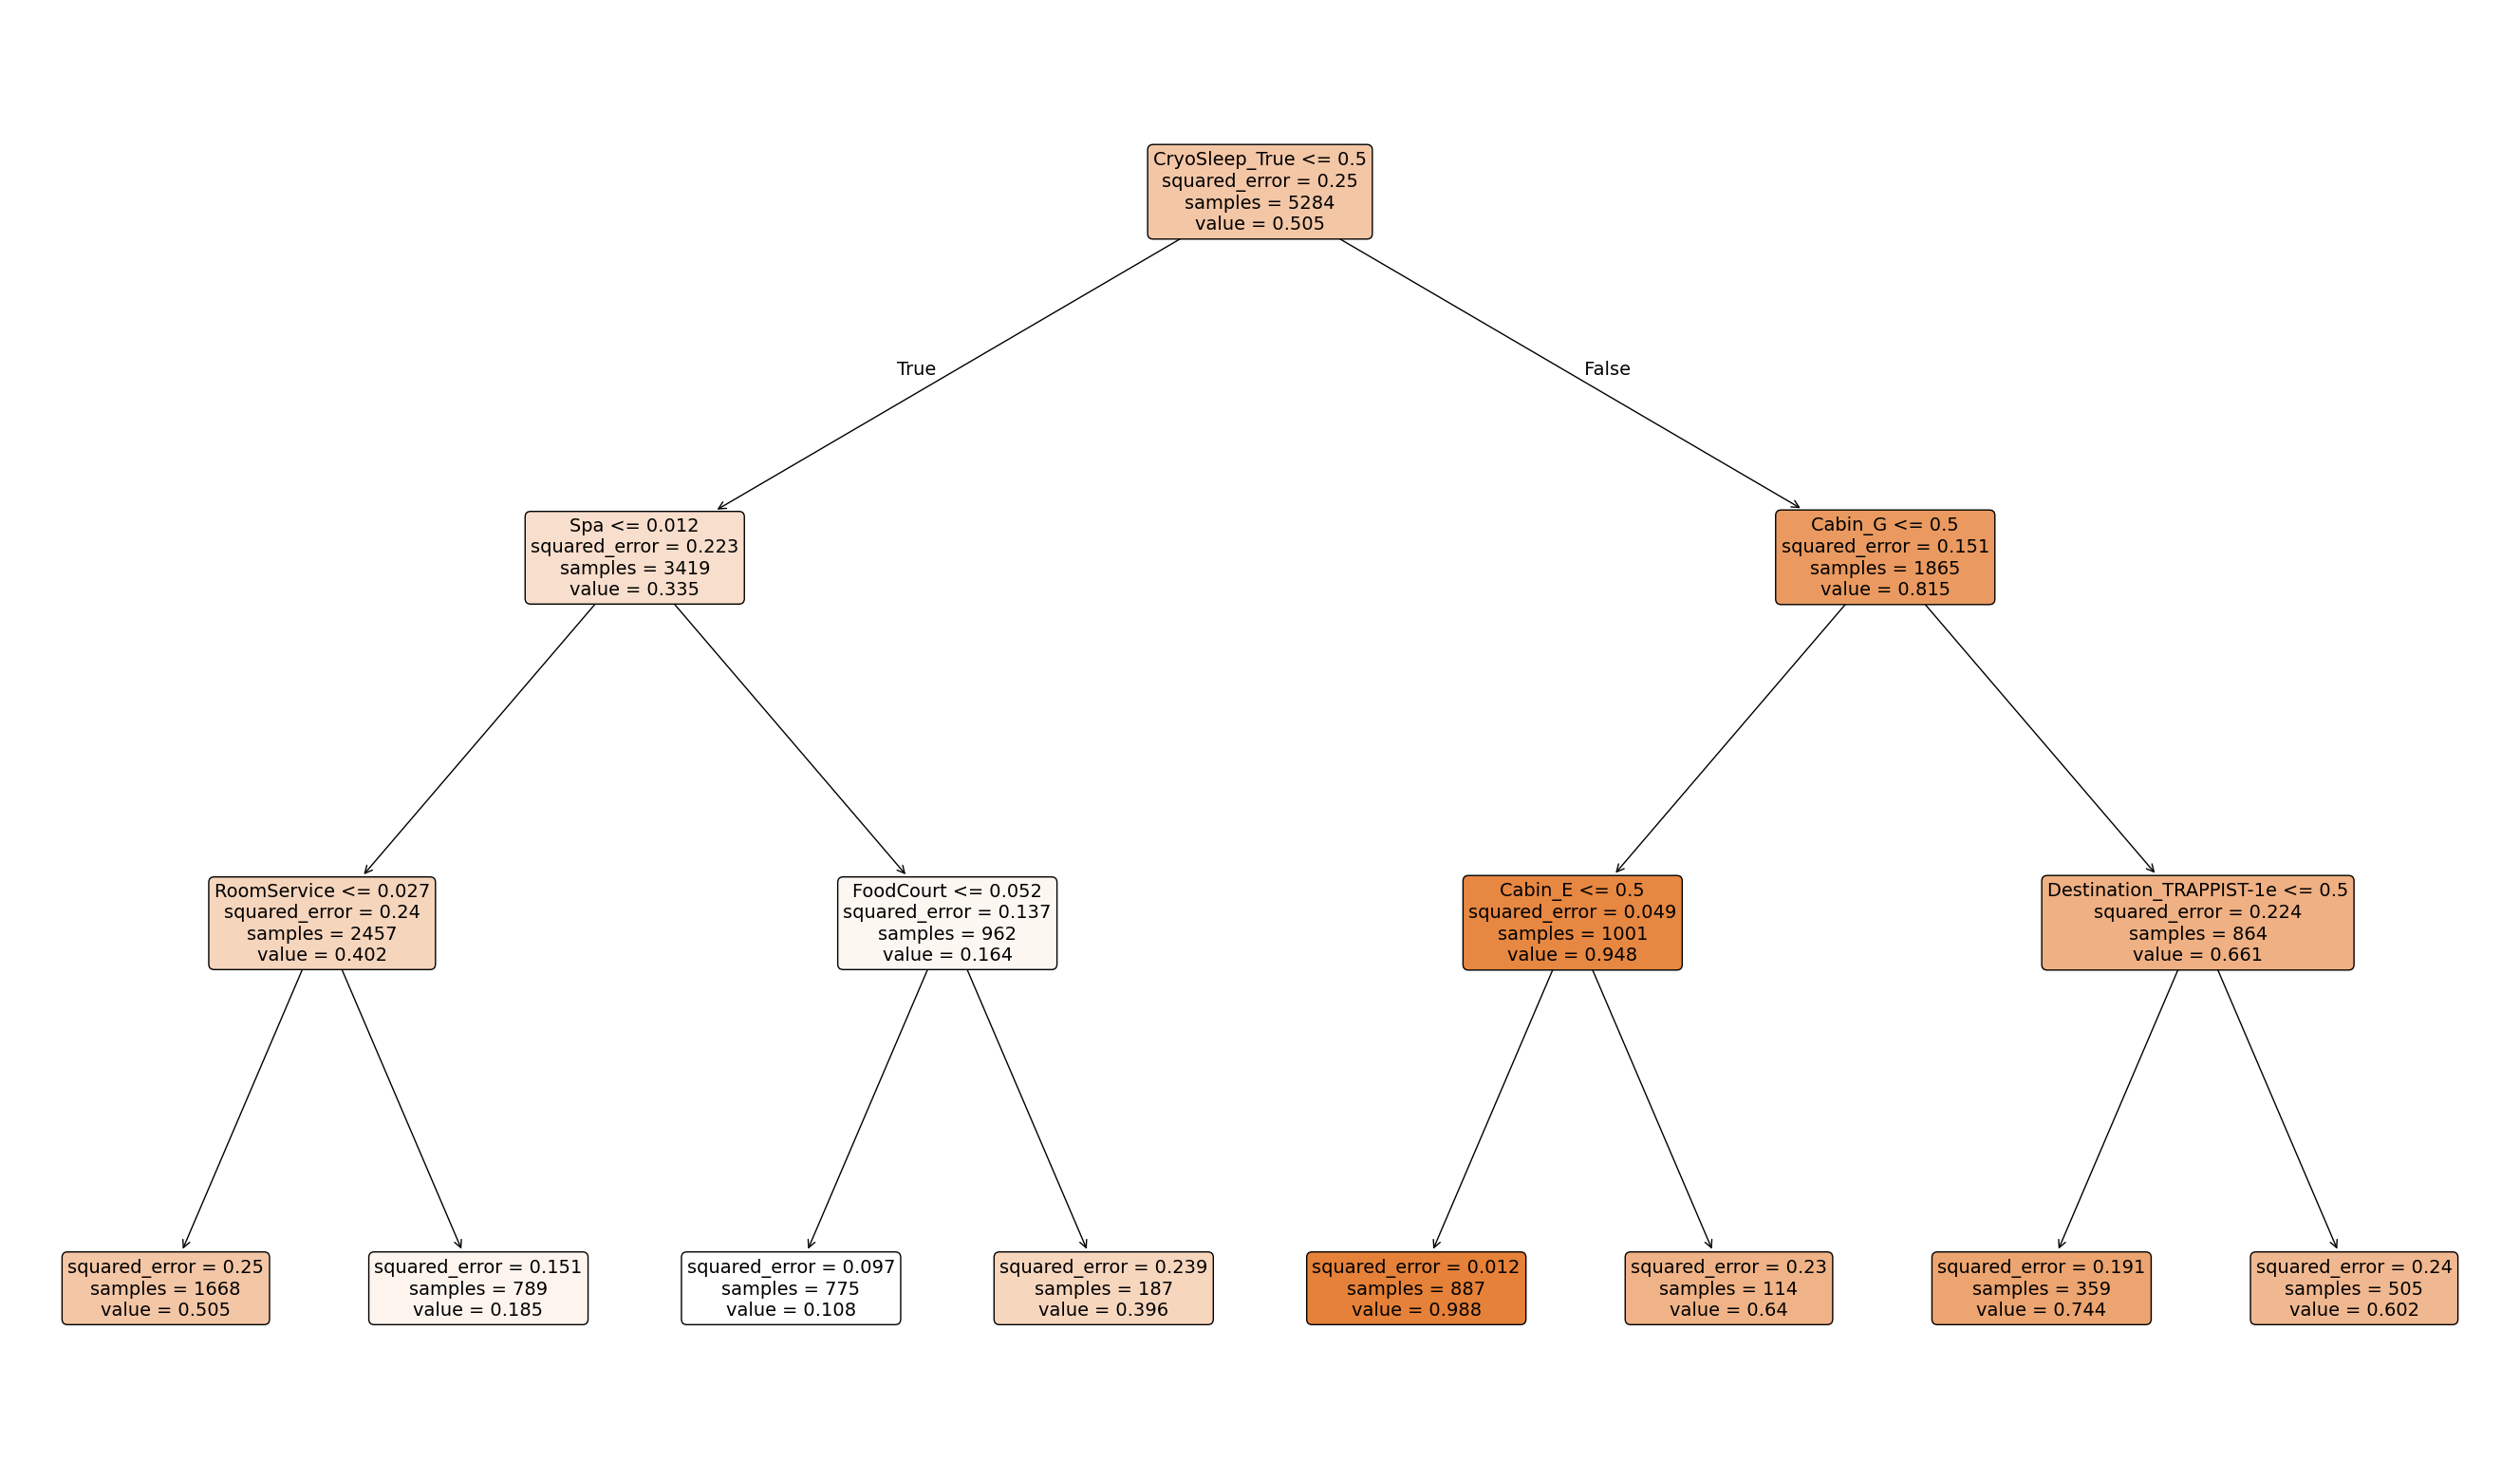

In [174]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()